In [1]:
RICA_HOME = "/home/spoudel/GRA/rica"

In [2]:
import os
import pickle
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import signal
from scipy.stats import zscore
import sys


sys.path.append(RICA_HOME)

%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples

In [3]:
power_df=pd.read_csv("power_df.csv")

In [4]:
t_sne = TSNE(n_components=3)


normalized_df = power_df.copy()
# normalized_df = normalized_df.drop(['timestamp'], axis=1)
normalized_df.iloc[:, 2:] = normalized_df.iloc[:, 2:].apply(zscore)

# Raw Power Points xForm
powerPoints = t_sne.fit_transform(power_df.iloc[:, 2:].values)
[powerX, powerY, powerZ] = powerPoints.T

# Normalized Power Points xForm
normPoints = t_sne.fit_transform(normalized_df.iloc[:, 2:].values)
[normX, normY, normZ] = normPoints.T

# Normalized and Clipped xForm
clipPoints = t_sne.fit_transform(normalized_df.iloc[:, 2:].clip(lower=-2, upper=2).values)
[clipX, clipY, clipZ] = clipPoints.T

/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/spoudel/anaconda3/envs/rica/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  F

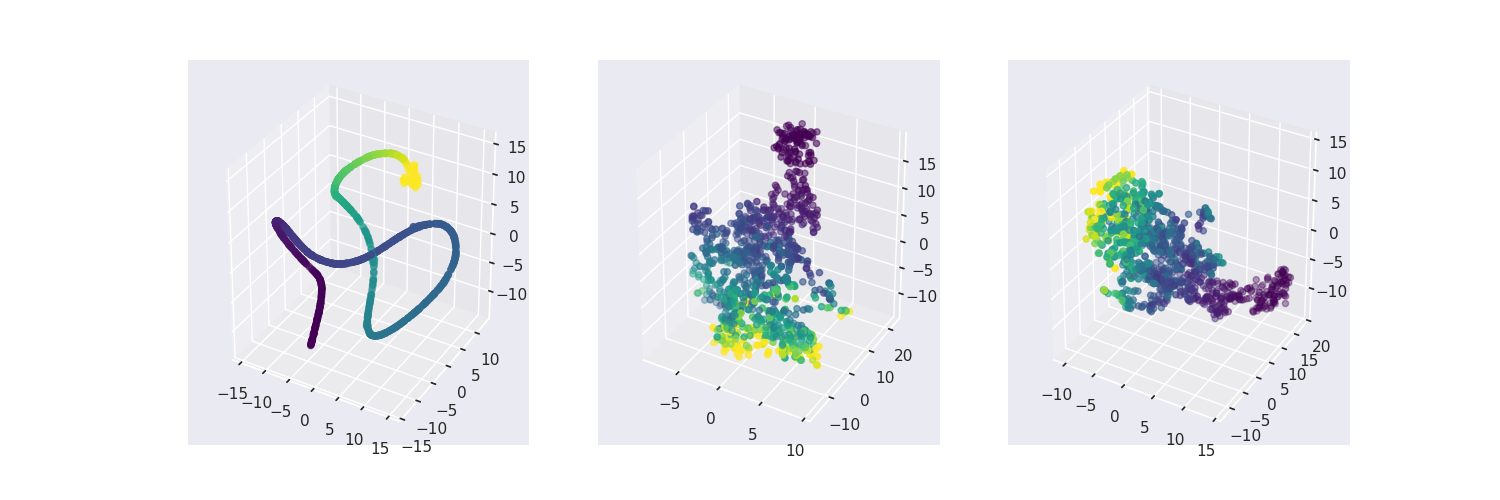

In [6]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(powerX, powerY, powerZ, c=power_df['total_power'], cmap='viridis')
ax = fig.add_subplot(132, projection='3d')
ax.scatter(normX, normY, normZ, c=power_df['total_power'], cmap='viridis')
ax = fig.add_subplot(133, projection='3d')
ax.scatter(clipX, clipY, clipZ, c=power_df['total_power'], cmap='viridis')